# Regression Task

In [19]:
import pandas as pd

In [20]:
import numpy as np

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [25]:
av_data= pd.read_csv('avocado.csv')

In [26]:
av_data = av_data.drop(columns=['Unnamed: 0'])

In [27]:
av_data['Date'] = pd.to_datetime(av_data['Date'])

In [28]:
label_encoder = LabelEncoder()
av_data['type'] = label_encoder.fit_transform(av_data['type'])
av_data['region'] = label_encoder.fit_transform(av_data['region'])

In [29]:
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
target = 'AveragePrice'

In [30]:
x = av_data[features]
y = av_data[target]

In [31]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [36]:
print (f'Maen Absolute Error (MAE): {mae}')
print (f'Mean Squared Error (MSE): {mse}')
print (f'Root Mean Squared Error (RMSE): {rmse}')
print (f'R-squared (R2): {r2}')

Maen Absolute Error (MAE): 0.24094605949871475
Mean Squared Error (MSE): 0.09752964693880227
Root Mean Squared Error (RMSE): 0.31229736940743236
R-squared (R2): 0.39297813291214156


In [37]:
import matplotlib.pyplot as plt

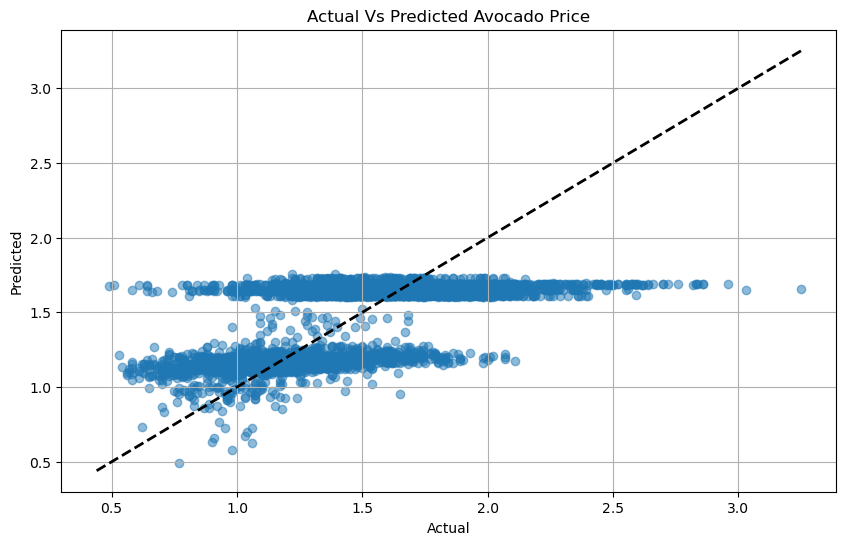

In [42]:
plt.figure(figsize=(10,6))
plt.scatter( y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted Avocado Price')
plt.grid(True)
plt.show()